# IMDb Comedies and Gender Analysis

By: Oliver Gladfelter

Date: 6/10/18

In [378]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline
import numpy as np
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [23]:
# merge of data Oliver Gladfelter prepared in IMDb-webscraping-merging-munging.ipynb 
# and writer-gender-comp-calculate.ipynb and ratings data Michael Hester web scraped from IMDb
episodes = pd.read_csv("top100AllDataAttempt3.csv", encoding='latin-1')

In [245]:
def convertToFloat(value):
    if type(value) is float:
        return value
    if len(value) < 5:
        return float(value)
    else:
        values = value.split(',')
        value = values[0] + values[1]
        return float(value)
    
def convertToInt(value):
    if type(value) is float:
        return float(value)
    if value != "\\N":
        return int(value)
    
def rounding(value):
    return round(value,2)

episodesNoMissing = episodes[(episodes['Males All Ages Rating'] != "-") & (episodes['Females All Ages Rating'] != "-")]
episodesNoMissing = episodesNoMissing.reset_index()
episodesNoMissing['Males All Ages Rating'] = episodesNoMissing['Males All Ages Rating'].astype(float)
episodesNoMissing['Females All Ages Rating'] = episodesNoMissing['Females All Ages Rating'].astype(float)
episodesNoMissing['Females All Ages Count'] = episodesNoMissing['Females All Ages Count'].apply(convertToFloat)
episodesNoMissing['Males All Ages Count'] = episodesNoMissing['Males All Ages Count'].apply(convertToFloat)
episodes['startYear'] = episodes['startYear'].apply(convertToInt)
episodesNoMissing['startYear'] = episodesNoMissing['startYear'].apply(convertToInt)
episodesNoMissing['perMaleWriteRounded'] = episodesNoMissing['perMaleWrite'].apply(rounding)

In [161]:
episodes.head(3)

,Episode Name,Show Name,episodeNumber,numWriters,parentTconst,perMaleWrite,runtimeMinutes,seasonNumber,startYear,totalNum,...,Males 18 to 29 Years Old Rating,Males 30 to 44 Years Old Count,Males 30 to 44 Years Old Rating,Males 45+ Years Old Count,Males 45+ Years Old Rating,Males All Ages Count,Males All Ages Rating,Males Under 18 Years Old Count,Males Under 18 Years Old Rating,writers
0,Pilot,2 Broke Girls,1.0,3,tt1845307,0.333333,21,1.0,2011.0,1.0,...,7.5,228,7,77,7.1,478,7.2,1,8,"Michael Patrick King,Whitney Cummings,Molly Mc..."
1,And the Break-Up Scene,2 Broke Girls,2.0,2,tt1845307,0.500000,22,1.0,2011.0,2.0,...,7.4,191,6.8,60,6.9,385,7,1,8,"Whitney Cummings,Michael Patrick King"
2,And Strokes of Goodwill,2 Broke Girls,3.0,3,tt1845307,0.666667,22,1.0,2011.0,3.0,...,7.7,179,6.8,56,7,358,7.1,1,8,"Jhoni Marchinko,Whitney Cummings,Michael Patri..."


# How Were Rick and Morty's Season 3 Ratings Compared to Seasons 1 & 2?

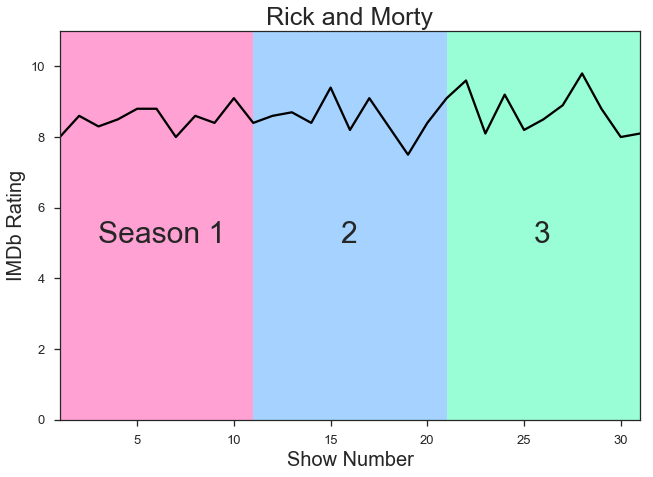

In [232]:
RickMorty = episodes[episodes['Show Name'] == 'Rick and Morty']

plt.plot(RickMorty["totalNum"], RickMorty['Both Gender All Ages Rating'], label = "Rating", c = 'black')
plt.ylim([0,11])
maxX = RickMorty['totalNum'].max()
plt.xlim([1,maxX])
plt.title(RickMorty['Show Name'].max(), fontsize = 25)
plt.xlabel('Show Number', fontsize = 20)
plt.ylabel("IMDb Rating", fontsize = 20)

seasonNumbers = RickMorty["seasonNumber"].unique()

topEpisodeList = []

for season in seasonNumbers:
    topEpisodeList.append(RickMorty[RickMorty["seasonNumber"] == season]["totalNum"].max())
    
plt.axvspan(1, topEpisodeList[0], color='deeppink', alpha=0.4, lw=0)
plt.text((1 + topEpisodeList[0]) / 2 - 3, 5, "Season 1", fontsize = 30)

for num in range(0, len(topEpisodeList) - 1):
    if (num % 2 == 0):
        plt.axvspan(topEpisodeList[num], topEpisodeList[num+1], color='dodgerblue', alpha=.4, lw=0)
    if (num % 3 != 0):
        plt.axvspan(topEpisodeList[num], topEpisodeList[num+1], color='mediumspringgreen', alpha=0.4, lw=0)
    plt.text((topEpisodeList[num] + topEpisodeList[num+1]) / 2 - .5, 5, str(num + 2), fontsize = 30)

plt.show()

# Distribution of all Values of Gender Compostion

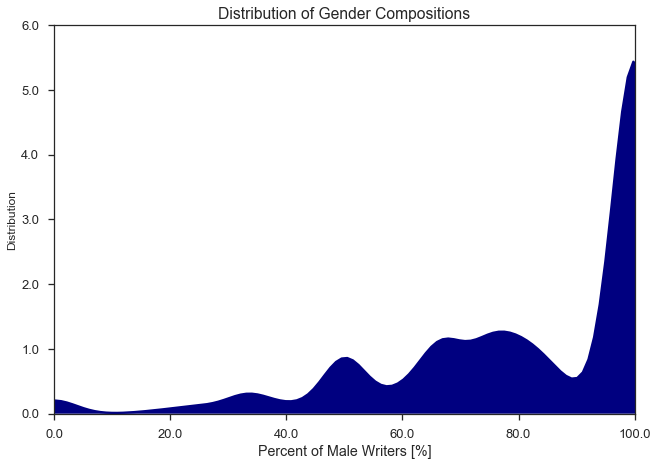

In [246]:
g = sns.kdeplot(episodes['perMaleWrite'], shade = True, legend = False, alpha=1, color = 'navy')
g.set(xlabel = 'Percent of Male Writers [%]', ylabel = 'Distribution')

plt.yticks(g.get_yticks(), g.get_yticks() * 1)
plt.ylabel('Distribution', fontsize=12)

plt.xticks(g.get_xticks(), g.get_xticks() * 100)
g.set(xlim=(0,1))
g.set(ylim=(0, None))
g.set(title = "Distribution of Gender Compositions")

# Scatter Gender Composition by IMDb Ratings

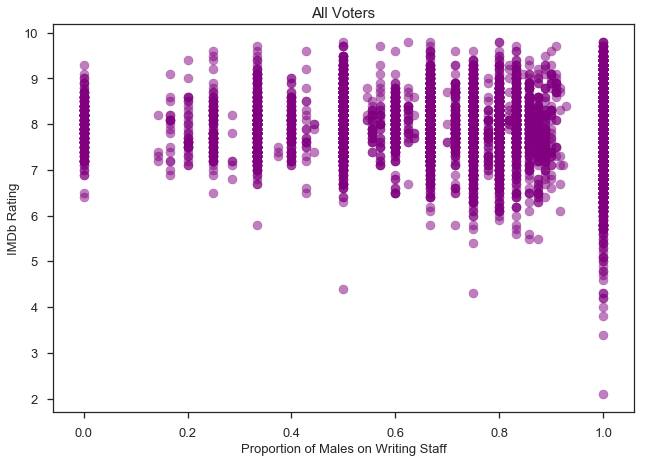

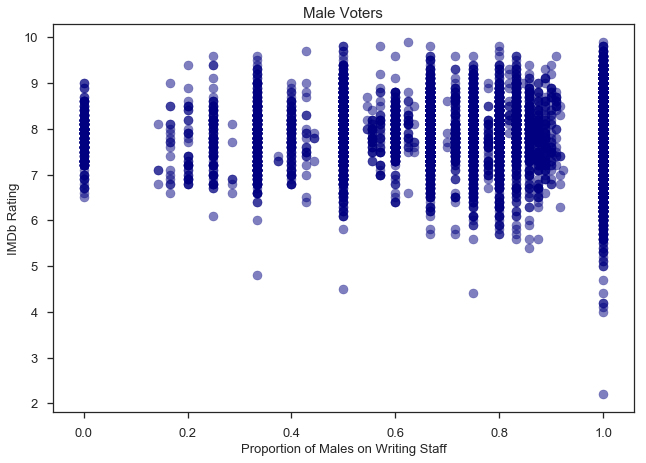

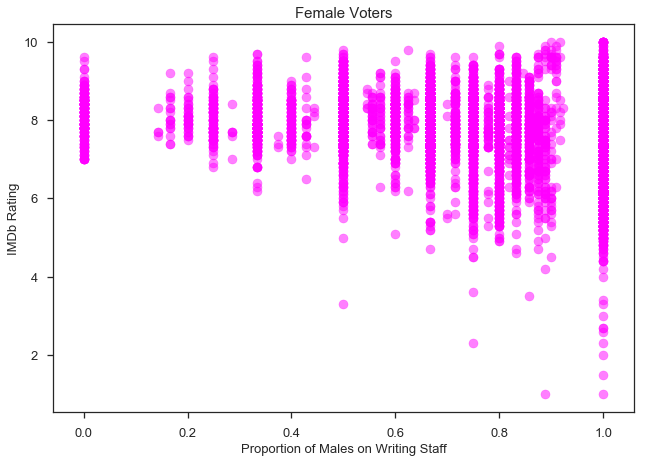

In [194]:
plt.scatter(episodes['perMaleWrite'], episodes['Both Gender All Ages Rating'], color = 'purple', alpha = .5)
plt.ylabel('IMDb Rating', fontsize = 13)
plt.xlabel('Proportion of Males on Writing Staff', fontsize = 13)
plt.title("All Voters", fontsize = 15)
plt.show()

plt.scatter(episodesNoMissing['perMaleWrite'], episodesNoMissing['Males All Ages Rating'], color = 'navy', alpha = .5)
plt.ylabel('IMDb Rating', fontsize = 13)
plt.xlabel('Proportion of Males on Writing Staff', fontsize = 13)
plt.title("Male Voters", fontsize = 15)
plt.show()

plt.scatter(episodesNoMissing['perMaleWrite'], episodesNoMissing['Females All Ages Rating'], color='magenta', alpha = .5)
plt.ylabel('IMDb Rating', fontsize = 13)
plt.xlabel('Proportion of Males on Writing Staff', fontsize = 13)
plt.title("Female Voters", fontsize = 15)
plt.show()

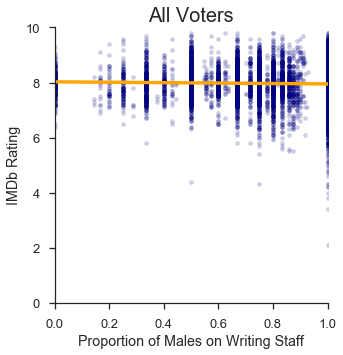

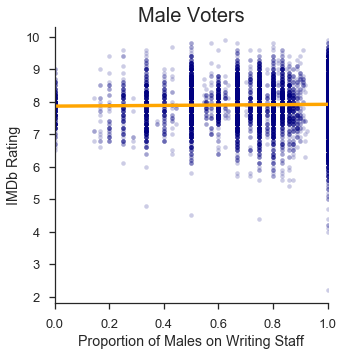

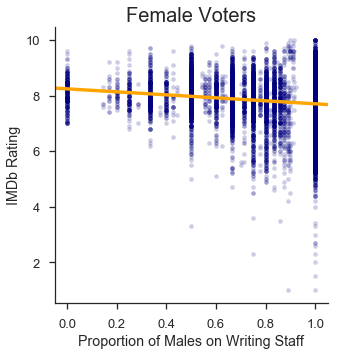

In [277]:
g = sns.lmplot('perMaleWrite', 'Both Gender All Ages Rating', data=episodes, markers=["."], size=5, line_kws={'color': 'orange'}, scatter_kws={'color': 'navy', 'alpha': 0.2})
g.set(xlabel = 'Proportion of Males on Writing Staff', ylabel = 'IMDb Rating')
g.set(xlim=(0, 1))
g.set(ylim=(0,10))
ax = plt.gca()
ax.set_title("All Voters", fontsize = 20)

g = sns.lmplot('perMaleWrite', 'Males All Ages Rating', data=episodesNoMissing, markers=["."], size=5, line_kws={'color': 'orange'}, scatter_kws={'color': 'navy', 'alpha': 0.2})
g.set(xlabel = 'Proportion of Males on Writing Staff', ylabel = 'IMDb Rating')
g.set(xlim=(0, 1))
ax = plt.gca()
ax.set_title("Male Voters", fontsize = 20)

g = sns.lmplot('perMaleWrite', 'Females All Ages Rating', data=episodesNoMissing, markers=["."], size=5, line_kws={'color': 'orange'}, scatter_kws={'color': 'navy', 'alpha': 0.2})
g.set(xlabel = 'Proportion of Males on Writing Staff', ylabel = 'IMDb Rating')
g.set(xlim=(-.05, 1.05))
ax = plt.gca()
ax.set_title("Female Voters", fontsize = 20)

# When Do Ratings Maximize? Are there Different Peaks for Male vs. Female vs. Overall Ratings?

([<matplotlib.axis.XTick at 0x145b7648898>,
 <a list of 4 Text xticklabel objects>)

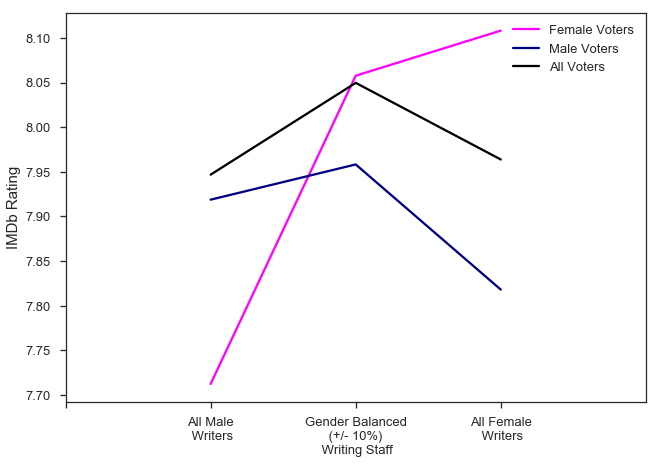

In [276]:
allMales = episodesNoMissing[episodesNoMissing['perMaleWrite'] == 1]
balanced = episodesNoMissing[(episodesNoMissing['perMaleWrite'] <= .6) & (episodesNoMissing['perMaleWrite'] >= .4)]
notAllMales = episodesNoMissing[episodesNoMissing['perMaleWrite'] < 1]
allFemales = episodesNoMissing[episodesNoMissing['perMaleWrite'] == 0]

femaleVotes = []
maleVotes = []
allVotes = []

femaleVotes.append(allMales['Females All Ages Rating'].mean())
femaleVotes.append(balanced['Females All Ages Rating'].mean())
femaleVotes.append(allFemales['Females All Ages Rating'].mean())

maleVotes.append(allMales['Males All Ages Rating'].mean())
maleVotes.append(balanced['Males All Ages Rating'].mean())
maleVotes.append(allFemales['Males All Ages Rating'].mean())

allVotes.append(allMales['Both Gender All Ages Rating'].mean())
allVotes.append(balanced['Both Gender All Ages Rating'].mean())
allVotes.append(allFemales['Both Gender All Ages Rating'].mean())

plt.plot([1,2,3],femaleVotes, color = 'magenta', label = 'Female Voters')
plt.plot([1,2,3],maleVotes, color = 'navy', label = 'Male Voters')
plt.plot([1,2,3],allVotes, color = 'black', label = 'All Voters')
plt.xlim(0,4)
plt.ylabel('IMDb Rating', fontsize = 15)
plt.legend(loc='best')
plt.xticks(np.arange(4), ('','All Male\n Writers', 'Gender Balanced\n (+/- 10%) \n Writing Staff', 'All Female\n Writers'))

# Charting Male and Female Vote Frequency Across Gender Composition - Males Vote More than Females Across the Board

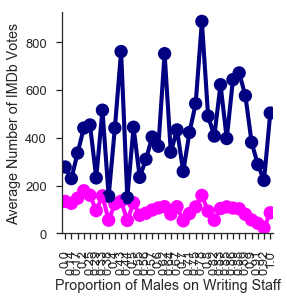

In [281]:
g=sns.factorplot(y="Females All Ages Count", x="perMaleWriteRounded", legend=False, color='magenta',data=episodesNoMissing, ci = None, label = 'Female Votes')
g.map(sns.pointplot,y="Males All Ages Count", x="perMaleWriteRounded", color = 'navy', data=episodesNoMissing,zorder='1000', ci = None, label = 'Male Votes')
g.set(ylabel='Average Number of IMDb Votes', xlabel='Proportion of Males on Writing Staff')
plt.xticks(rotation=90)
g.set(ylim=(0, 925))

# Change in Gender Composition Over Time

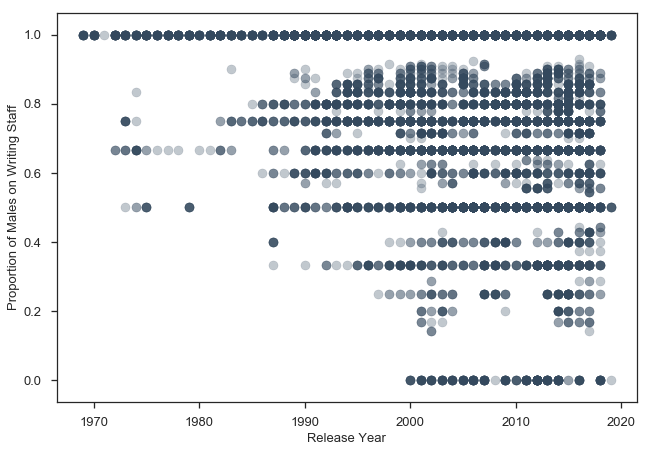

In [244]:
#g=sns.factorplot(x="perMaleWrite", y="Both Gender All Ages Rating", legend=False,color='blue',data=episodes)
plt.scatter(episodes['startYear'], episodes['perMaleWrite'], color='#34495e', alpha = .3)
plt.ylabel('Proportion of Males on Writing Staff', fontsize = 13)
plt.xlabel('Release Year', fontsize = 13)
plt.show()

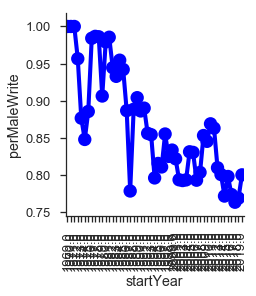

In [308]:
ax = sns.factorplot(y="perMaleWrite", x="startYear", legend=False,color='blue',data=episodes, ci = None)
ax.set_xticklabels(rotation=90)

# Out of the Top 10 Comedies, Which One is the Most Popular?
### (Popularity Measured by Average Number of IMDb Votes Per Episode)

(0, 2500)

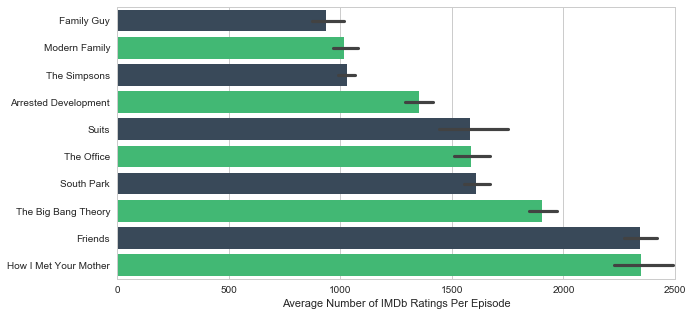

In [137]:
def top10(value):
    if value in ["Family Guy", "Modern Family", "The Simpsons", "Arrested Development", "Suits", "The Office", "South Park", "The Big Bang Theory", "Friends", "How I Met Your Mother"]:
        return 1
    else:
        return 0
    
episodes['top10'] = episodes['Show Name'].apply(top10)

top10 = episodes[episodes['top10'] == 1]

oliver = ["#34495e", "#2ecc71"]
sns.set_palette(oliver)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 5))

# Plot the total crashes
sns.set_color_codes("pastel")
g = sns.barplot(x="Both Gender All Ages Count", y="Show Name", data=top10,
            label="Total", palette=oliver, order = ["Family Guy", "Modern Family", "The Simpsons", "Arrested Development", "Suits", "The Office", "South Park", "The Big Bang Theory", "Friends", "How I Met Your Mother"])
g.set(xlabel = "Average Number of IMDb Ratings Per Episode", ylabel = "")
g.set_xlim(0, 2500)

# Group Data by Unique Show

In [380]:
shows = episodesNoMissing.groupby('Show Name').mean()

shows['ranking'] = ""

for show in range(0, len(shows)):
    shows['ranking'][show] = show + 1
    
shows = shows.drop(['index', 'startYear', 'perMaleWriteRounded', 'seasonNumber', 'top10', 'episodeNumber', 'numWriters', 'totalNum'], axis = 1)
shows['femaleVotePer'] = shows2['Females All Ages Count'] / (shows2['Females All Ages Count'] + shows2['Males All Ages Count'])
shows = shows.sort_values(by = 'femaleVotePer')
    
shows.head()

,perMaleWrite,Both Gender All Ages Rating,Females All Ages Count,Females All Ages Rating,Males All Ages Count,Males All Ages Rating,ranking,femaleVotePer
Show Name,,,,,,,,
2 Broke Girls,0.522636,7.226087,76.681159,7.600000,181.181159,7.010145,1,NaN
30 Rock,0.363768,8.116058,85.372263,8.326277,411.569343,8.061314,2,NaN
3rd Rock from the Sun,0.652621,7.871942,32.424460,7.968345,127.489209,7.841007,3,NaN
90210,0.807707,7.247368,37.517544,7.550877,52.842105,6.629825,4,NaN
Adventure Time,0.852010,8.040767,20.320557,7.798606,174.515679,8.017073,5,NaN


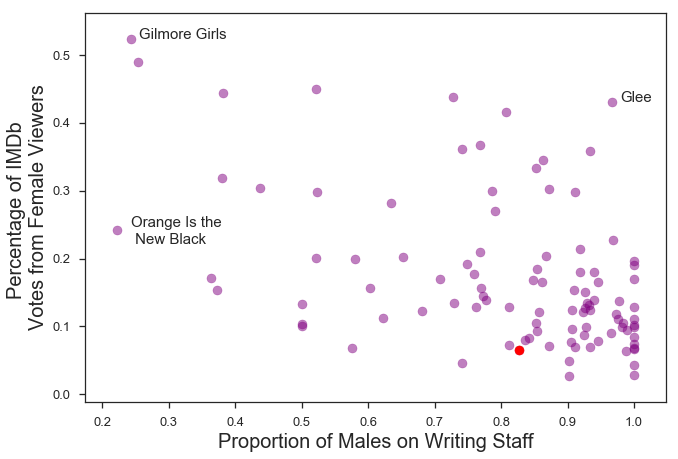

In [303]:
plt.scatter(shows['perMaleWrite'], shows['femaleVotePer'], color = 'purple', alpha = .5)
plt.xlabel("Proportion of Males on Writing Staff", fontsize = 20)
plt.ylabel("Percentage of IMDb \nVotes from Female Viewers", fontsize = 20)
plt.annotate("Glee",(.98,.431205),fontsize=15)
plt.annotate("Gilmore Girls",(.255,.524),fontsize=15)
plt.annotate("Orange Is the\n New Black",(.244,.222393),fontsize=15)
plt.scatter(.826459,0.065720, c='red') # This makes the Rick and Morty point pop out
plt.show()

## Same graph, but each point is sized relative to how many episodes the show has released

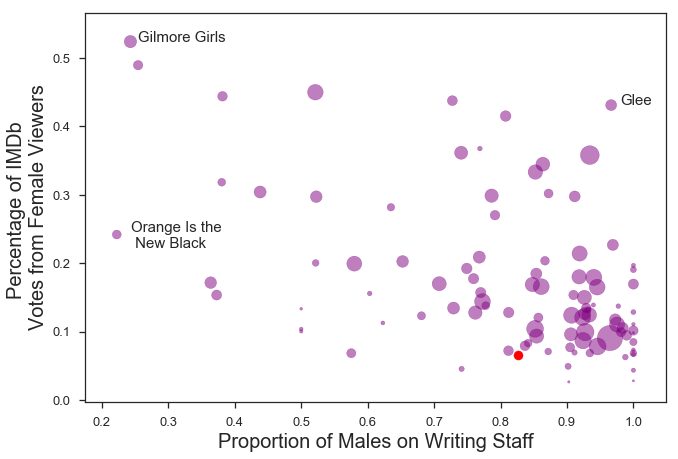

In [338]:
# Add a new variable: number of episodes released by each show
showsWithCounts = episodes.groupby('Show Name').count()
showCounts = showsWithCounts.loc[:,['startYear']]
showCounts = showCounts.reset_index()
new_columns = showCounts.columns.values
new_columns[-1] = 'numEpisodes'

shows2 = shows.reset_index()
meansAndCounts = shows2.merge(showCounts)

# Graph with variable point sizes
plt.scatter(meansAndCounts['perMaleWrite'], meansAndCounts['femaleVotePer'], s = meansAndCounts['numEpisodes'], color = 'purple', alpha = .5)
plt.xlabel("Proportion of Males on Writing Staff", fontsize = 20)
plt.ylabel("Percentage of IMDb \nVotes from Female Viewers", fontsize = 20)
plt.annotate("Glee",(.98,.431205),fontsize=15)
plt.annotate("Gilmore Girls",(.255,.524),fontsize=15)
plt.annotate("Orange Is the\n New Black",(.244,.222393),fontsize=15)
plt.scatter(.826459,0.065720, c='red') # This makes the Rick and Morty point pop out
plt.show()

# Regression Analysis of Relationship Between Episode Rating and Writing Staff Gender Composition

### Overall

In [340]:
df = pd.DataFrame({"A": episodes['Both Gender All Ages Rating'], "B": episodes['perMaleWrite']})
result = sm.ols(formula="A ~ B", data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.548
Date:                Thu, 14 Jun 2018   Prob (F-statistic):            0.00201
Time:                        18:01:31   Log-Likelihood:                -11714.
No. Observations:               12150   AIC:                         2.343e+04
Df Residuals:                   12148   BIC:                         2.345e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.0261      0.021    381.374      0.0

### Male Voters

In [342]:
df = pd.DataFrame({"A": episodesNoMissing['Males All Ages Rating'], "B": episodesNoMissing['perMaleWrite']})
result = sm.ols(formula="A ~ B", data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.932
Date:                Thu, 14 Jun 2018   Prob (F-statistic):             0.0264
Time:                        18:02:40   Log-Likelihood:                -11839.
No. Observations:               12134   AIC:                         2.368e+04
Df Residuals:                   12132   BIC:                         2.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8653      0.021    369.372      0.0

### Female Voters

In [341]:
df = pd.DataFrame({"A": episodesNoMissing['Females All Ages Rating'], "B": episodesNoMissing['perMaleWrite']})
result = sm.ols(formula="A ~ B", data=df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     253.5
Date:                Thu, 14 Jun 2018   Prob (F-statistic):           1.68e-56
Time:                        18:02:18   Log-Likelihood:                -15525.
No. Observations:               12134   AIC:                         3.105e+04
Df Residuals:                   12132   BIC:                         3.107e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2428      0.029    285.699      0.0

# Generalizable Code & Efficient Analysis of Multiple Shows

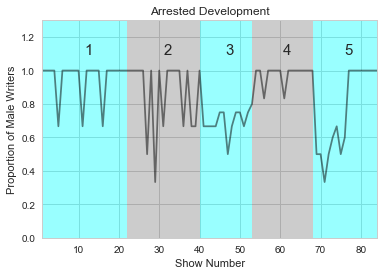

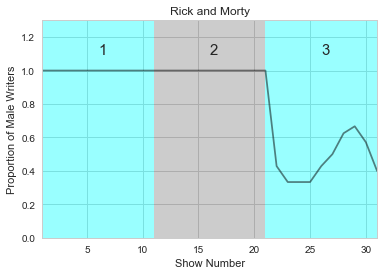

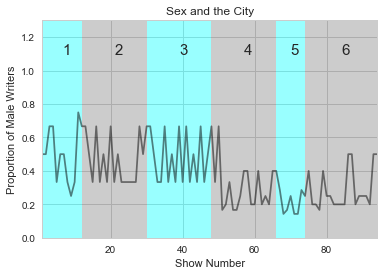

In [379]:
def makeGraph(showName):
    
    dataSet = episodes[episodes['Show Name'] == showName]
    
    dataSet['rating'] = (dataSet['Both Gender All Ages Rating'] / 10)
    
    plt.plot(dataSet["totalNum"], dataSet["perMaleWrite"], color = 'black', alpha = .5, label = 'Proportion of Male Writers on Staff')
    #plt.plot(dataSet["totalNum"], dataSet['rating'], label = "Rating")
    plt.ylim([0,1.3])
    maxX = dataSet['totalNum'].max()
    plt.xlim([1,maxX])
    plt.title(dataSet['Show Name'].max())
    plt.xlabel('Show Number')
    #plt.xticks([])
    plt.ylabel('Proportion of Male Writers')
    #plt.legend(loc='upper left', frameon=True)
    
    # Alternatvie region shading by season
    seasonNumbers = dataSet["seasonNumber"].unique()

    topEpisodeList = []

    for season in seasonNumbers:
        topEpisodeList.append(dataSet[dataSet["seasonNumber"] == season]["totalNum"].max())

    plt.axvspan(1, topEpisodeList[0], color='cyan', alpha=0.4, lw=0)
    plt.text((1 + topEpisodeList[0]) / 2, 1.1, "1", fontsize = 15)

    for num in range(0, len(topEpisodeList) - 1):
        if (num % 2 == 0):
            plt.axvspan(topEpisodeList[num], topEpisodeList[num+1], color='gray', alpha=0.4, lw=0)
        if (num % 2 != 0):
            plt.axvspan(topEpisodeList[num], topEpisodeList[num+1], color='cyan', alpha=0.4, lw=0)
        plt.text((topEpisodeList[num] + topEpisodeList[num+1]) / 2, 1.1, str(num + 2), fontsize = 15)
    
    plt.show()
    
makeGraph("Arrested Development")
makeGraph("Rick and Morty")
makeGraph("Sex and the City")

In [365]:
showNameList = top10['Show Name'].unique()

ArrestedDevelopment = episodes[episodes['Show Name'] == showNameList[0]]
FamilyGuy = episodes[episodes['Show Name'] == showNameList[1]]
Friends = episodes[episodes['Show Name'] == showNameList[2]]
HIMYM = episodes[episodes['Show Name'] == showNameList[3]]
ModernFamily = episodes[episodes['Show Name'] == showNameList[4]]
SouthPark = episodes[episodes['Show Name'] == showNameList[5]]
Suits = episodes[episodes['Show Name'] == showNameList[6]]
TBBT = episodes[episodes['Show Name'] == showNameList[7]]
Office = episodes[episodes['Show Name'] == showNameList[8]]
Simpsons = episodes[episodes['Show Name'] == showNameList[9]]

top10DataSets = [ArrestedDevelopment, FamilyGuy, Friends, HIMYM, ModernFamily, RickMorty, SouthPark, Suits, TBBT, Office, Simpsons]

In [354]:
ListofLists = []

for dataSet in top10DataSets:
    
    dataSetNoFemales = dataSet[dataSet['perMaleWrite'] == 1]
    dataSetFemales = dataSet[dataSet['perMaleWrite'] != 1]
    
    LoL.append([dataSet['Show Name'].max(), dataSetNoFemales['Both Gender All Ages Rating'].mean(), dataSetFemales['Both Gender All Ages Rating'].mean()])
    
slopeChartDF = pd.DataFrame(ListofLists, columns = ['Show', 'Average of Episodes with No Female Writers', 'Average of Episodes with Female Writers'])

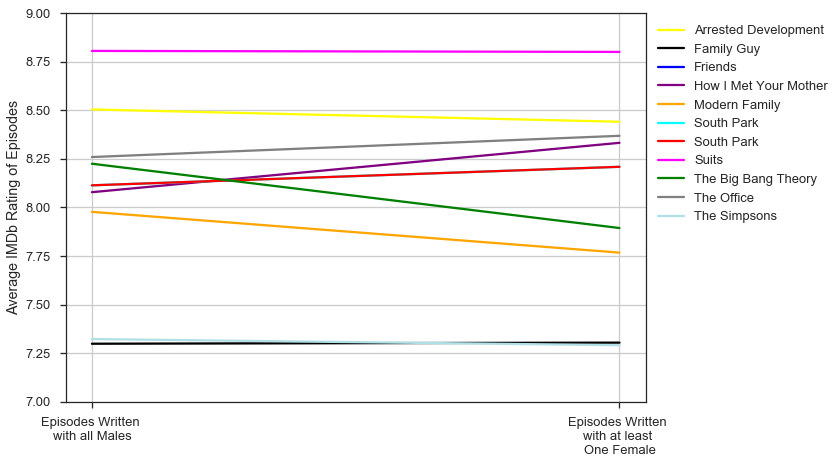

In [359]:
x = [0, 1]
ylist = []
colorList = ['yellow', 'black', 'blue', 'purple', 'orange', 'cyan', 'red', 'magenta', 'green', 'gray', 'c']

for show in range (0, len(slopeChartDF)):
    ylist.append([slopeChartDF['Average of Episodes with No Female Writers'][show], slopeChartDF['Average of Episodes with Female Writers'][show]])

for show in range (0, len(slopeChartDF)):
    plt.plot(x, ylist[show], label=slopeChartDF['Show'][show], c=colorList[show])

plt.ylim(7.0, 9.0)

plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xticks(np.arange(2), ('Episodes Written \nwith all Males', 'Episodes Written \nwith at least \nOne Female'))
plt.ylabel("Average IMDb Rating of Episodes")
plt.grid(b=None)
          
plt.show()

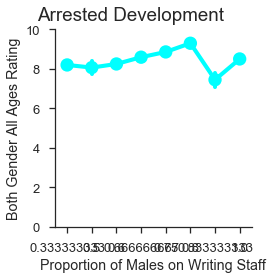

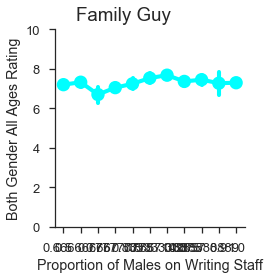

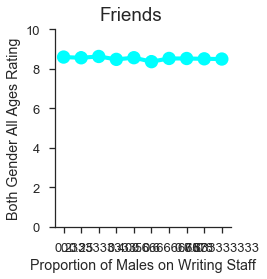

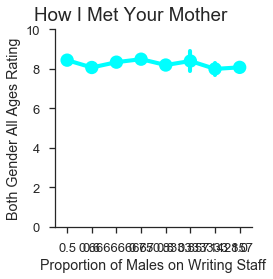

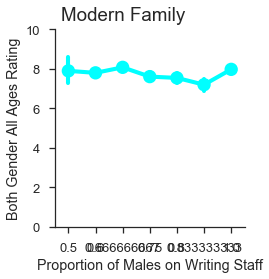

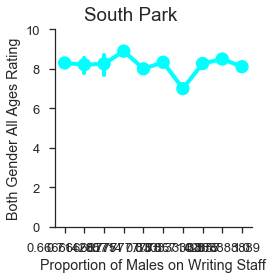

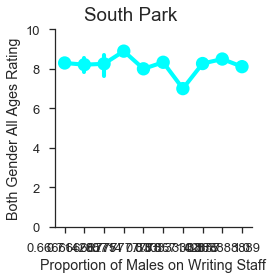

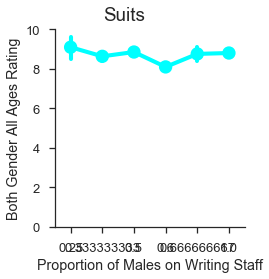

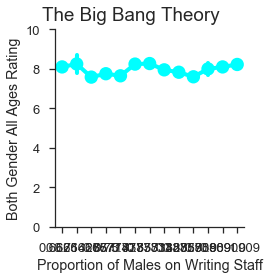

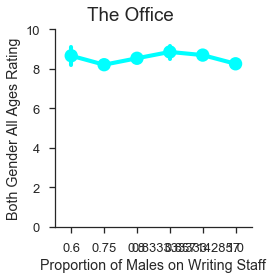

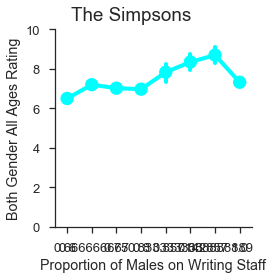

In [361]:
for dataSet in top10DataSets:
    
    g=sns.factorplot(x="perMaleWrite", y="Both Gender All Ages Rating", legend=False,color='cyan',data=dataSet)
    g.set(ylim=(0, 10))
    g.set(xlabel = 'Proportion of Males on Writing Staff')
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(dataSet['Show Name'].max())